In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/Othercomputers/내 MacBook Air/lab/paper/code/kospi_index.csv')

## JSON file parsing

In [ ]:
# 모두의 말뭉치 json file parsing해서 경제 기사만 날짜와 본문을 pandas dataframe 형식으로 추출
import os
import json
import pandas as pd

folderpath = r"/content/drive/Othercomputers/내 MacBook Air/lab/paper/news/NIKL_NEWSPAPER_2021_v1.0/국립국어원 신문 말뭉치 2021(버전 1.0)" # make sure to put the 'r' in front
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]
all_files = []
df = pd.DataFrame(columns=['date', 'news'])

for path in filepaths:
    with open(path, 'r') as json_file:
         #읽은 파일을 제이슨 형식으로 형변환
        json_cor = json.load(json_file)
        json_id =  json_cor.get('id')
        json_meta = json_cor.get('metadata')
        json_docu = json_cor.get('document')
        for i in range (len(json_docu)):
            id = json_docu[i]['id']
            title = json_docu[i]['metadata']['title']
            sentence = json_docu[i]['paragraph']
            topic = json_docu[i]['metadata']['topic']
            date = json_docu[i]['metadata']['date']
            paragraph = ''
            if topic == '경제':
                for j in range(len(sentence)):
                    sent_form = sentence[j]['form']
                    paragraph += sent_form
                temp = pd.DataFrame([[date, paragraph]], columns=['date', 'news'])
                df = pd.concat([df,temp])


In [ ]:
# dataframe에서 '코스피'단어가 포함된 것들만 추출해서 kospi_news로 만들
text_series = news['news']
s = text_series.str.contains('코스피')
kospi_news = news[s]
kospi_news = kospi_news.reset_index()
kospi_news = kospi_news[['date', 'news']]
kospi_news.head()
# kospi_news.to_csv('/content/drive/Othercomputers/내 MacBook Air/lab/paper/code/kospi_new.csv') #csv파일로 중간 저장

## KOSPI 2020 data 받아오기 

In [ ]:
# finance-datareader로 2020년 코스피 데이터를 dataframe으로
!pip install finance-datareader
import FinanceDataReader as fdr
stock = fdr.DataReader('KS11','2020','20210101')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 5.7 MB/s 


In [ ]:
df = df[['date','news']]
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df1 = df.set_index('date')

In [ ]:
inner_join = pd.merge(stock, 
                      df1, 
                      how ='inner',
                      left_index=True, right_index=True)

'증시 수익률 효자 IT…"54% 올랐다"지난해 증시 수익률 효자가 IT섹터인 것으로 조사됐다. 연간 수익률은 40%에 육박했다. 반도체 시장 개선에 대한 기대감이 삼성전자와 SK하이닉스의 주가에 선반영됐고, 5G 시대의 개막 속에 삼성SDI 등이 탄탄한 오름세를 보였다.2일 한화투자증권 리서치센터에 따르면 지난해 IT는 글로벌 주식시장에서 약 47%의 수익률을 기록하면서 시장을 주도했다. 코스피 시장 내 IT 상승률 역시 32.8%를 기록했다.코스피와 코스닥 시장의 업종별 대표 종목으로 구성한 KRX섹터지수 역시 반도체의 상승세가 두드러진다. 지난해 KRX 반도체 지수 수익률은 54.48%에 육박했다. KRX 정보기술 지수는 28.47% 증가하면서 수익률 2위에 올랐다.특히 SK하이닉스가 강세를 보였다. 지난해 SK하이닉스 주가는 55.54% 뛰어올랐다. KRX 반도체 지수 내 SK하이닉스 비중은 19.79%다. 원익IPS(78.36%), 고영(27.88%) 등도 급등했다.정보기술 지수에서는 삼성전자와 삼성SDI 등이 지난해 각각 44.19%, 7.76%의 오름세를 기록하면서 탄탄한 수익을 냈다.다만 IT를 제외한 국내 주식시장 수익률은 글로벌 흐름과 상반됐다. 섹터별로 보면 글로벌 시장에서 △산업재 26% △커뮤니케이션서비스 25% △경기소비재 24% △헬스케어 23% △금융 22% △필수소비재 20% △소재 19% △유틸리티 18% △에너지 8% 등은 수익을 냈다.반면 국내 주식시장은 △산업재 △헬스케어 △필수소비재 △소재 △유틸리티 △에너지 등은 최대 20%에서 최저 5%대 손실률을 기록했다. 수익을 낸 섹터는 커뮤니케이션과 경기소비재로 이마저도 1~3% 수준에 머물렀다.국가별 수익률 순위를 봐도 하위권에 머물렀다. 지난해 국내 주식시장 수익률은 약 7%대 상승률에 그쳤다. 이는 말레이시아와 인도네시아 다음으로 최하위 수준이다. 수익률 상위권에 랭크된 중국과 브라질은 30%대 수익률을 내며 견고한 성장률을 과시했다.김수연 한화투자증권 연구원은 “지난해 

In [ ]:
inner_join.head()

,Close,Open,High,Low,Volume,Change,news
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102,"증시 수익률 효자 IT…""54% 올랐다""지난해 증시 수익률 효자가 IT섹터인 것으로..."
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102,2020년 증시 흔들 대내외 변수보니…결국 트럼프올해 국내 증시에 커다란 영향을 미...
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102,"수출 개선·실적 회복 기대감↑...""코스피 '1월 효과' 주목""국내증시가 2020년..."
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102,"""지점 통폐합하고, 리서치 줄이고'...비용감축 나선 증권사증권사가 지점을 줄이는 ..."
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102,"코스피, 기관·외인 '팔자'에 하락 전환…""차익 실현 매물""새해 첫 거래일을 맞아 ..."


In [ ]:
df2 = inner_join[['Change', 'news']]
df2.head()

,Change,news
2020-01-02,-0.0102,"증시 수익률 효자 IT…""54% 올랐다""지난해 증시 수익률 효자가 IT섹터인 것으로..."
2020-01-02,-0.0102,2020년 증시 흔들 대내외 변수보니…결국 트럼프올해 국내 증시에 커다란 영향을 미...
2020-01-02,-0.0102,"수출 개선·실적 회복 기대감↑...""코스피 '1월 효과' 주목""국내증시가 2020년..."
2020-01-02,-0.0102,"""지점 통폐합하고, 리서치 줄이고'...비용감축 나선 증권사증권사가 지점을 줄이는 ..."
2020-01-02,-0.0102,"코스피, 기관·외인 '팔자'에 하락 전환…""차익 실현 매물""새해 첫 거래일을 맞아 ..."


## preprocessing(mecab)

In [ ]:
# mecab import 코드
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash
from konlpy.tag import Mecab
mecab = Mecab()

In [5]:
df.rename(columns = {'Unnamed: 0':'Date', 'news':'News'}, inplace=True)

In [6]:
groupby_date = df.groupby('Date')['News'].apply(lambda x: "%s" % ' '.join(x))

In [9]:
groupby_change = df.groupby('Date')['Change'].apply(np.mean)

In [8]:
df_date = groupby_date.to_frame()

In [10]:
df_change = groupby_change.to_frame()

In [11]:
df3 = pd.merge(df_date, df_change, left_on='Date', right_on='Date', how='inner')
df3

,News,Change
Date,,
2020-01-02,"증시 수익률 효자 IT…""54% 올랐다""지난해 증시 수익률 효자가 IT섹터인 것으로...",-0.0102
2020-01-03,중동 무력갈등 '암초' 만난 증시…차익 실현 심리 고개드나장중 2200선을 돌파했던...,0.0006
2020-01-06,중동 리스크에 코스피 1월효과 무색미국과 이란의 갈등으로 당분간 국내 증시 약세는 ...,-0.0098
2020-01-07,"한진칼 2대주주 KCGI ""한진그룹, 부채비율 개선 노력 없어""한진그룹의 경영권을 ...",0.0095
2020-01-08,"안전자산서 돌아오던 투심, 이란 악재에 유턴유로존 투자자 기대지수가 반등하면서 불어...",-0.0111
...,...,...
2020-12-23,코스피도 코로나블루(?)…산타랠리는연말 시즌이 도래하면서 성탄절이 목전으로 다가온 ...,0.0096
2020-12-24,코로나 속 배당주 '코스피 보다 코스닥'코로나19(코로나 바이러스 감염증)에도 불구...,0.0170
2020-12-28,금융지원에 부실징후기업 감소…경영정상화 힘든 D등급 91개사금융권의 유동성 지원에 ...,0.0006


In [12]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

content = np.array(df3.News)
news = np.array([' '.join(mecab.nouns(sent)) for sent in content])
cont = np.array([re.sub('[^a-zA-Zㄱ-ㅣ가-힣]', ' ', dat) for dat in news])

In [13]:
tfidf_vectorizer = TfidfVectorizer(min_df=150)
tfidf_vectorizer.fit(cont)
col = sorted(tfidf_vectorizer.vocabulary_.items())
word = [w[0] for w in col]
text = pd.DataFrame(tfidf_vectorizer.transform(news).toarray(), columns=word)

In [21]:
text['Date'] = df3.index

In [32]:
text = text.set_index(['Date'])

In [33]:
text.Change = df3.Change

In [35]:
text.to_csv('/content/drive/Othercomputers/내 MacBook Air/lab/paper/code/tf_idf.csv')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()

y_target = text['Change']
x_data = text.drop(['Change'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=2022)

print(y_target)
print(x_data)

#alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_mse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_mse))

Date
2020-01-02   -0.0102
2020-01-03    0.0006
2020-01-06   -0.0098
2020-01-07    0.0095
2020-01-08   -0.0111
               ...  
2020-12-23    0.0096
2020-12-24    0.0170
2020-12-28    0.0006
2020-12-29    0.0042
2020-12-30    0.0188
Name: Change, Length: 248, dtype: float64
                  가격        가능        가량       가운데       가이드        가치  \
Date                                                                     
2020-01-02  0.017358  0.054881  0.010929  0.034300  0.004047  0.031370   
2020-01-03  0.054647  0.077132  0.000000  0.015426  0.009101  0.007838   
2020-01-06  0.067647  0.135829  0.018320  0.045276  0.012720  0.015337   
2020-01-07  0.041287  0.094136  0.006666  0.018827  0.000000  0.003189   
2020-01-08  0.092736  0.079244  0.015781  0.024764  0.005844  0.010066   
...              ...       ...       ...       ...       ...       ...   
2020-12-23  0.014942  0.062007  0.031362  0.032480  0.010452  0.030005   
2020-12-24  0.045330  0.036883  0.011193  0.026345  0.01

In [37]:
#Ridge에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

#alphas list값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    #cross_val_score를 이용해 5folds의 평균 RMSE계산
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5folds의 평균 RMSE: {1:.3f} '.format(alpha, avg_rmse))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=8.44561e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.3891e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in 

alpha 0일 때 5folds의 평균 RMSE: 0.022 
alpha 0.1일 때 5folds의 평균 RMSE: 0.015 
alpha 1일 때 5folds의 평균 RMSE: 0.014 
alpha 10일 때 5folds의 평균 RMSE: 0.016 
alpha 100일 때 5folds의 평균 RMSE: 0.017 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Gl

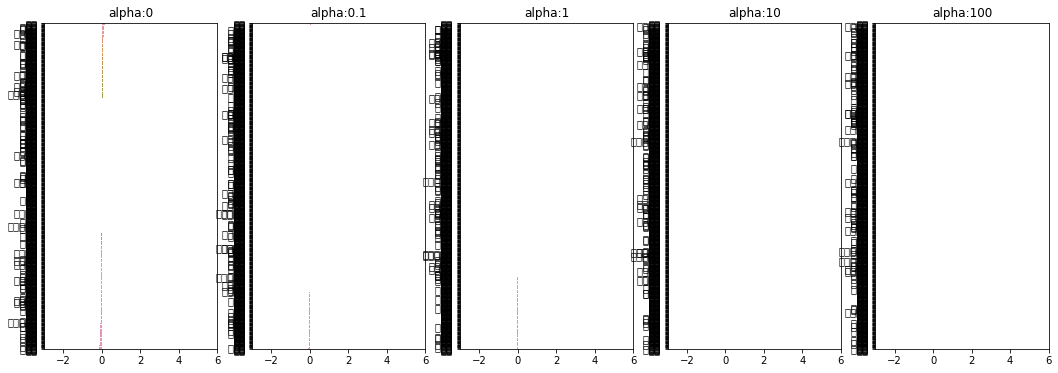

      alpha:0  alpha:0.1   alpha:1  alpha:10  alpha:100
가격   0.042124   0.019849  0.003440  0.000172   0.000012
가능  -0.035631   0.005413  0.000560  0.000020   0.000001
가량   0.064809   0.012878  0.001578  0.000138   0.000014
가운데 -0.074933  -0.021119 -0.002777 -0.000191  -0.000017
가이드 -0.041467  -0.005485 -0.000096  0.000149   0.000023
..        ...        ...       ...       ...        ...
회사  -0.014115  -0.005456 -0.001305 -0.000279  -0.000031
회의   0.026542   0.019690  0.004017  0.000218   0.000002
효과  -0.074260  -0.013280 -0.001534 -0.000138  -0.000015
흐름  -0.011911  -0.003098  0.000072  0.000173   0.000027
흥국  -0.040752  -0.024510 -0.004633 -0.000319  -0.000020

[578 rows x 5 columns]


In [38]:
#각 alpha에 따른 회귀 계수 값을 시각화하기 위한 준비
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame생성
coeff_df = pd.DataFrame()

#alphas 리스트 갑슬 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)

    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    #막대 그래프로 각 alpha값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()
print(coeff_df)